In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
sns.set_style('darkgrid')

total_df = pd.read_csv('/data/total_data.csv')

#Unicamente toma los datos de los 801 primer pokemones que tenemos info
reduce_df = total_df.iloc[:801,:]

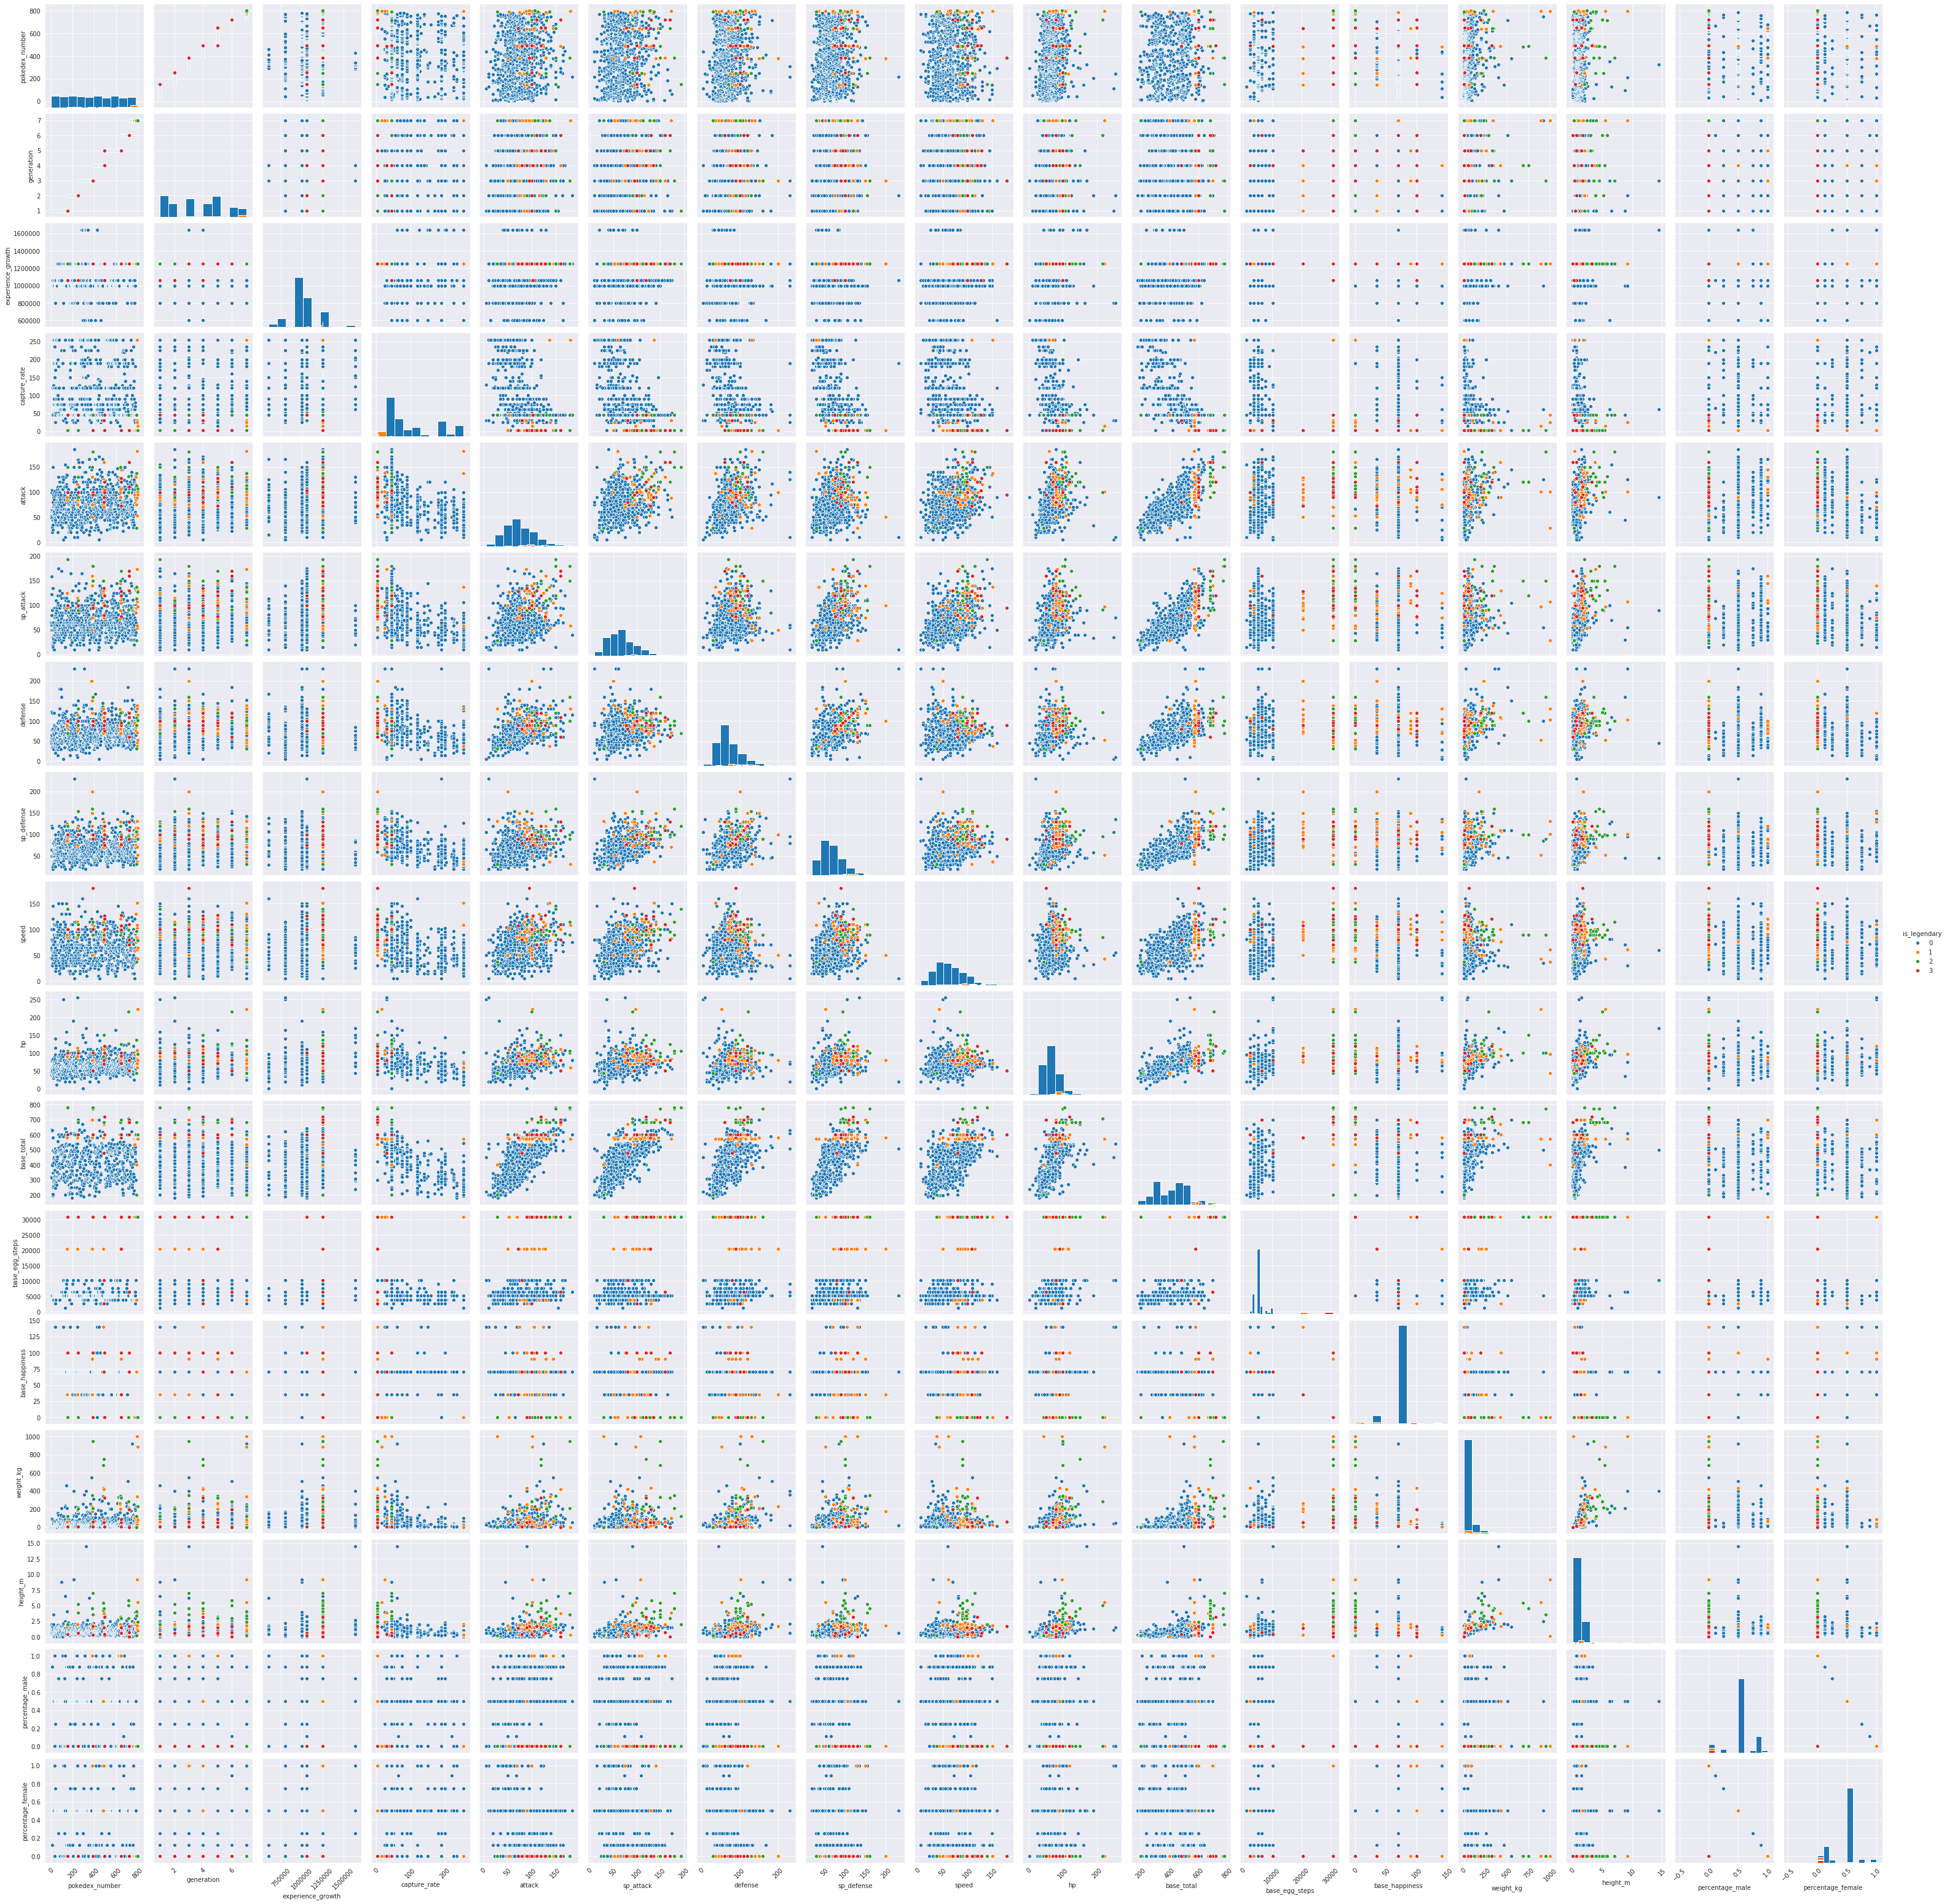

In [4]:
grafica = sns.pairplot(reduce_df, hue='is_legendary',diag_kind='hist')
for ax in grafica.axes.flat:
    plt.setp(ax.get_xticklabels(),rotation=45)

In [5]:
reduce_df.columns

Index(['pokedex_number', 'generation', 'is_legendary', 'experience_growth',
       'capture_rate', 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed',
       'hp', 'base_total', 'base_egg_steps', 'base_happiness', 'weight_kg',
       'height_m', 'percentage_male', 'percentage_female', 'type_1', 'tipe_2',
       'abilities_1', 'abilities_2', 'abilities_3'],
      dtype='object')

In [24]:
hp = reduce_df['hp'].values
attack = reduce_df['attack'].values
defense = reduce_df['defense'].values
sp_attack = reduce_df['sp_attack'].values
sp_defense = reduce_df['sp_defense'].values
speed = reduce_df['speed'].values
base_total = reduce_df['base_total'].values
base_egg_steps = reduce_df['base_egg_steps'].values
capture_rate = reduce_df['capture_rate'].values
experience_growth = reduce_df['experience_growth'].values
is_legendary = reduce_df['is_legendary'].values
base_happiness = reduce_df['base_happiness'].values

In [48]:
#Regresion para calcular la experience_growth

X = np.array([hp,attack,defense,sp_attack,sp_defense,speed]).T
Y = np.array([experience_growth]).T

reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)
error = np.sqrt(mean_squared_error(Y,Y_pred))

r2 = reg.score(X,Y)

print('El error es: {}'.format(error))
print('El valor r2 es: {}'.format(r2))
print('Los coeficientes son: \n{} '.format(reg.coef_))

#Test
hp_t = 67
attack_t = 73
defense_t = 67
sp_attack_t = 73
sp_defense_t = 67
speed_t = 73
experience_growth_t = reg.predict([[hp_t,attack_t, defense_t,sp_attack_t,sp_defense_t,speed_t]])
print('test result: {}'.format(experience_growth_t))

new_values = {}
for n in range(801,893):
    attack_t = total_df.iloc[n,5]
    sp_attack_t = total_df.iloc[n,6]
    defense_t = total_df.iloc[n,7]
    sp_defense_t =   total_df.iloc[n,8]
    speed_t = total_df.iloc[n,9]
    hp_t = total_df.iloc[n,10]
    experience_growth_t = reg.predict([[hp_t,attack_t, defense_t,sp_attack_t,sp_defense_t,speed_t]])
    new_values[n+1] = [experience_growth_t]
print(new_values) 

df_out = pd.DataFrame([[key, new_values[key]] for key in new_values.keys()], columns=['pokedex_numer', 'experience_growth'])

df_out.to_csv('foo.csv')


El error es: 152885.0247370937
El valor r2 es: 0.08873493412906819
Los coeficientes son: 
[[ 800.47973581  603.48200743  326.82621262  605.42834899 -566.26223835
   271.92053406]] 
test result: [[1053585.58531325]]
{802: [array([[1119034.54260929]])], 803: [array([[1053585.58531325]])], 804: [array([[1104328.68725835]])], 805: [array([[1083170.92281926]])], 806: [array([[1120064.89295575]])], 807: [array([[1125776.51816234]])], 808: [array([[1027911.78289353]])], 809: [array([[1169866.36211913]])], 810: [array([[1022728.10877666]])], 811: [array([[1059178.8563727]])], 812: [array([[1112593.1750285]])], 813: [array([[1024168.42083132]])], 814: [array([[1056318.56505169]])], 815: [array([[1095690.97776724]])], 816: [array([[1023895.24960471]])], 817: [array([[1064954.66481054]])], 818: [array([[1107970.21990958]])], 819: [array([[1023264.36256619]])], 820: [array([[1088599.1529345]])], 821: [array([[993775.23110021]])], 822: [array([[1036563.23697969]])], 823: [array([[1075335.79083252]]

In [37]:
total_df.iloc[802,:]

pokedex_number               803
generation                     7
is_legendary                   1
experience_growth            NaN
capture_rate                 NaN
attack                        73
sp_attack                     73
defense                       67
sp_defense                    67
speed                         73
hp                            67
base_total                   420
base_egg_steps               NaN
base_happiness               NaN
weight_kg                    1.8
height_m                     0.6
percentage_male                0
percentage_female              0
type_1                    poison
tipe_2                       NaN
abilities_1          Beast Boost
abilities_2                  NaN
abilities_3                  NaN
Name: 802, dtype: object

In [49]:
#Regresion para calcular el base_egg_steps

X = np.array([hp,attack,defense,sp_attack,sp_defense,speed]).T
Y = np.array([base_egg_steps]).T

reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)
error = np.sqrt(mean_squared_error(Y,Y_pred))

r2 = reg.score(X,Y)

print('El error es: {}'.format(error))
print('El valor r2 es: {}'.format(r2))
print('Los coeficientes son: \n{} '.format(reg.coef_))

#Test
hp_t = 67
attack_t = 73
defense_t = 67
sp_attack_t = 73
sp_defense_t = 67
speed_t = 73
base_egg_steps_t = reg.predict([[hp_t,attack_t, defense_t,sp_attack_t,sp_defense_t,speed_t]])

print('test result: {}'.format(base_egg_steps_t))


#prueba para todos los datos
new_values = {}
for n in range(801,893):
    attack_t = total_df.iloc[n,5]
    sp_attack_t = total_df.iloc[n,6]
    defense_t = total_df.iloc[n,7]
    sp_defense_t =   total_df.iloc[n,8]
    speed_t = total_df.iloc[n,9]
    hp_t = total_df.iloc[n,10]
    base_egg_steps_t = reg.predict([[hp_t,attack_t, defense_t,sp_attack_t,sp_defense_t,speed_t]])
    new_values[n+1] = [base_egg_steps_t]
print(new_values) 

df_out = pd.DataFrame([[key, new_values[key]] for key in new_values.keys()], columns=['pokedex_numer', 'base_egg_steps'])

df_out.to_csv('foo2.csv')


El error es: 5648.867215836236
El valor r2 es: 0.2571634864043747
Los coeficientes son: 
[[47.0097746  13.73094106 22.84437849 39.09670048 14.52656545 30.75621287]] 
test result: [[7109.38138809]]
{802: [array([[11799.67004185]])], 803: [array([[7109.38138809]])], 804: [array([[11387.72302007]])], 805: [array([[8779.90426723]])], 806: [array([[11142.46672225]])], 807: [array([[12290.43294939]])], 808: [array([[3598.55683122]])], 809: [array([[12048.51617027]])], 810: [array([[3883.55517138]])], 811: [array([[6893.58206339]])], 812: [array([[9804.5307346]])], 813: [array([[3860.52188435]])], 814: [array([[6874.40732678]])], 815: [array([[9711.91866303]])], 816: [array([[4638.51993876]])], 817: [array([[7771.39130724]])], 818: [array([[10819.01054645]])], 819: [array([[3302.29830077]])], 820: [array([[8325.01537556]])], 821: [array([[2137.25582632]])], 822: [array([[5575.67802629]])], 823: [array([[8922.0108492]])], 824: [array([[276.14516691]])], 825: [array([[4197.78612093]])], 826: [a

In [49]:
#Regresion para calcular el capture_rate

X = np.array([hp,attack,defense,sp_attack,sp_defense,speed]).T
Y = np.array([capture_rate]).T

reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)
error = np.sqrt(mean_squared_error(Y,Y_pred))

r2 = reg.score(X,Y)

print('El error es: {}'.format(error))
print('El valor r2 es: {}'.format(r2))
print('Los coeficientes son: \n{} '.format(reg.coef_))

#Test
hp_t = 67
attack_t = 73
defense_t = 67
sp_attack_t = 73
sp_defense_t = 67
speed_t = 73
capture_rate_t = reg.predict([[hp_t,attack_t, defense_t,sp_attack_t,sp_defense_t,speed_t]])
print('test result: {}'.format(capture_rate_t))

El error es: 53.32238199149608
El valor r2 es: 0.51033976249267
Los coeficientes son: 
[[-0.6077735  -0.34726201 -0.46980757 -0.40893617 -0.4813904  -0.47843802]] 
test result: [[102.37686149]]


In [59]:
#Regresion para calcular el base_happiness

X = np.array([hp,attack,defense,sp_attack,sp_defense,speed]).T
Y = np.array([base_happiness]).T

reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)
error = np.sqrt(mean_squared_error(Y,Y_pred))

r2 = reg.score(X,Y)

print('El error es: {}'.format(error))
print('El valor r2 es: {}'.format(r2))
print('Los coeficientes son: \n{} '.format(reg.coef_))

#Test
hp_t = 67
attack_t = 73
defense_t = 67
sp_attack_t = 73
sp_defense_t = 67
speed_t = 73
base_happiness_t = reg.predict([[hp_t,attack_t, defense_t,sp_attack_t,sp_defense_t,speed_t]])

print('test result: {}'.format(base_happiness_t))

El error es: 18.662397108128236
El valor r2 es: 0.09215466552970164
Los coeficientes son: 
[[ 0.02597919 -0.09475148 -0.06289829 -0.0934419   0.01225677 -0.02375106]] 
test result: [[65.78481662]]


In [24]:
#Regresion para calcular el Base_total

X = np.array([hp,attack,defense,sp_attack,sp_defense,speed]).T
Y = np.array([base_total]).T

reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)
error = np.sqrt(mean_squared_error(Y,Y_pred))

r2 = reg.score(X,Y)

print('El error es: {}'.format(error))
print('El valor r2 es: {}'.format(r2))
print('Los coeficientes son: \n{} '.format(reg.coef_))

#Test
hp_t = 67
attack_t = 73
defense_t = 67
sp_attack_t = 73
sp_defense_t = 67
speed_t = 73
base_total_t = reg.predict([[hp_t,attack_t, defense_t,sp_attack_t,sp_defense_t,speed_t]])

print('test result: {}'.format(base_total_t))

El error es: 6.811771225970255e-14
El valor r2 es: 1.0
Los coeficientes son: 
[[1. 1. 1. 1. 1. 1.]] 
test result: [[420.]]


In [54]:
#Regresion para calcular la is_legendary

X = np.array([hp,attack,defense,sp_attack,sp_defense,speed]).T
Y = np.array([is_legendary]).T

reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)
error = np.sqrt(mean_squared_error(Y,Y_pred))

r2 = reg.score(X,Y)

print('El error es: {}'.format(error))
print('El valor r2 es: {}'.format(r2))
print('Los coeficientes son: \n{} '.format(reg.coef_))

#Test
hp_t = 105
attack_t = 120
defense_t = 105
sp_attack_t = 70
sp_defense_t = 95
speed_t = 105
is_legendary_t = reg.predict([[hp_t,attack_t, defense_t,sp_attack_t,sp_defense_t,speed_t]])
print('test result: {}'.format(is_legendary_t))

El error es: 0.2451374662096972
El valor r2 es: 0.2465247333684668
Los coeficientes son: 
[[0.00143495 0.00029879 0.00116424 0.00173292 0.00078403 0.00168458]] 
test result: [[0.27070333]]
